# Autoencoders

Autoencoders are an unsupervised learning architectures in neural networks. Theys are commonly used in Deep Learning tasks; such as generative models, anomaly detection, dimensionality reduction. In this lecture, we will evaluate theoretical approaches of Autoencoders and see it's extensions. Autoencoders are an unsupervised learning method. They map the input data into lower dimensional space with encoder $E$, and then maps into same space that have same dimension of input data with decoder $D$.

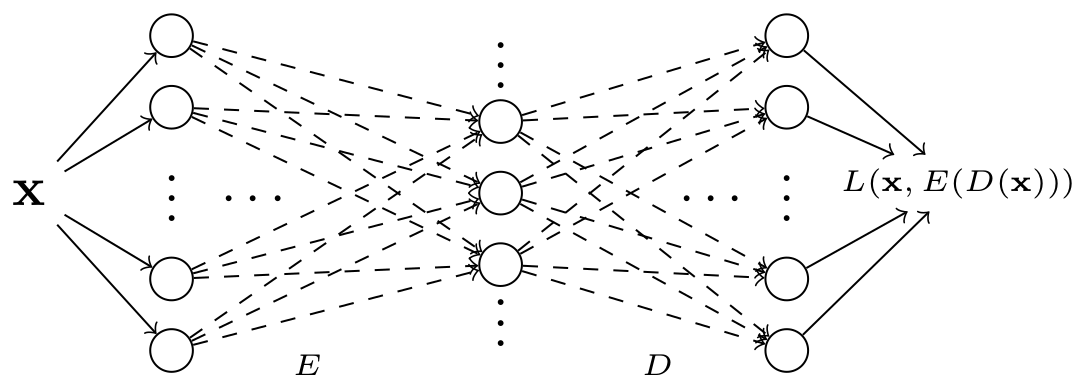

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/ae1.png",width=600, height=600)

The main idea behind Autoencoders is to attempt to copy its input to its output. The input layer is fed with input vector $\mathbf{x}$ and the loss is calculated at output layer between $\mathbf{x}$ and $E(D(\mathbf{x}))$, in other words the loss is $L(\mathbf{x},E(D(\mathbf{x})))$. It measures difference between our original input and the consequent reconstruction.  We named the middle layer, that is connection between encoder $E$ and decoder $D$, as the "bottleneck". We can denote our output of bottleneck as $\mathbf{h} = E(\mathbf{x})$ and denote our output as $\mathbf{\hat{x}} = D(\mathbf{h}) = D(E(\mathbf{x}))$. We can define our encoder and decoder as conditional probability density function that are $p_{encoder}(\mathbf{h} | \mathbf{x})$ and $p_{decoder}(\mathbf{\hat{x}} | \mathbf{h})$.

The loss function is named reconstruction loss which is $L(\mathbf{\hat{x}},\mathbf{x})$. We can treat the process as a feedforward networks; the loss can be minimized via mini-batch statistics following gradients computed by backpropagation algorithm,

$$\min\limits_{\theta} L = \nabla_\theta L(\mathbf{x}, D(E(\mathbf{x}))) =\nabla_\theta L(\mathbf{x}, \mathbf{\hat{x}}) $$

The bottleneck is the key of the effectiveness of Autoencoders. We map our input vector to bottleneck: the bottleneck keeps the 'latent informations' of input $\mathbf{x}$. The network represents input but in lower dimensions. In other words, it behaves like a approximative compression algorithm. The encoding parameters are learned in training process. Then we map bottleneck information $\mathbf{h}$ into same dimension as input $\mathbf{x}$. Then, this procedure can be seen as approximative extracting compressed latent information.

## Undercomplete Autoencoders

The simplest idea behind autoencoders is the decreasing the number of nodes through the hidden layers before bottleneck. An autoencoder that has dimension less than the input $\mathbf{x}$ is called undercomplete autoencoder. When we minimize the reconstruction error, autoencoder learns to represent latent attributes of input data with lower dimensions than input $\mathbf{x}$'s. This procedure is same as in Principal Component Analysis (PCA) but in non-linear way. When decoder is linear and the loss $L(\mathbf{\hat{x},\mathbf{x}})$ is the $L^2$ error, an autocomplete autoencoder learns to span the same subspace as PCA. When autoencoder has non-linear activations, then autoencoder becomes more powerful and generalized in dimensionality reduction, it becames non-linear version of PCA.

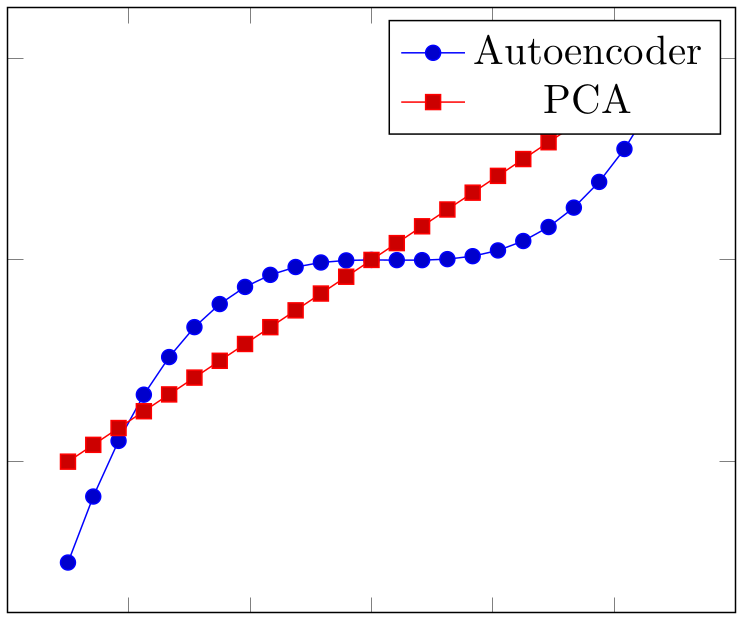

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/ae2.png",width=300, height=300)

### The Problem Of Autoencoders

When we said that main idea behind autoencoders is to copy input to its output, the key idea is that not to copy without extracting useful informations about the distribution of the data. Autoencoders are allowed too much capacity, easy to be trained to the copying the task with learning anything useful about the dataset. So we need to penalize those autoencoders.

### Denoising Autoencoder
As we said, autoencoders are allowerd too much capacity. Regularized autoencoders can give us the task that find the latent features of input, instead of copying the input. There are lot of regularization methods to prevent copying task such as Sparse Autoencoders or Denoising Autoencoders.  We can achieve the task that learning useful informations about data by adding some noise to input data. 

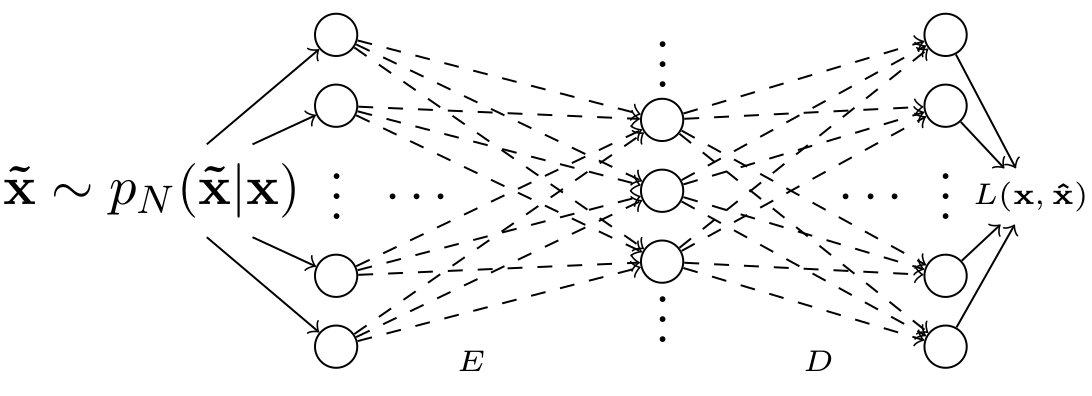

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/ae3.png",width=600, height=600)

In other words, we can achive it by changing the reconstruction loss. We defined our minimization,

<font size="3">
$$\min\limits_{\theta} L = \nabla_\theta L(\mathbf{x}, D(E(\mathbf{x}))) =\nabla_\theta L(\mathbf{x}, \mathbf{\hat{x}}) $$
</font>


To perform the denoising, the input $\mathbf{x}$ is corrupted into $\mathbf{\tilde{x}}$ through stochastic mapping  of $\mathbf{\tilde{x}} \sim p_{N}(\mathbf{\tilde{x}}|\mathbf{x})$. Then the noisy (corrupted) input is used for encoding and decoding parts

<font size="3">
$$\mathbf{h} = E(\mathbf{\tilde{x}})$$

$$\mathbf{\hat{x}} = D(\mathbf{h}) = D(E(\mathbf{\tilde{x}})_{\mathbf{\tilde{x}} \sim p_{N}(\mathbf{\tilde{x}}|\mathbf{x})})$$
</font>

Then the minimization task is updated as 

<font size="3">
$$\min\limits_{\theta} L = \nabla_\theta L(\mathbf{x}, D(E(\mathbf{\tilde{x}})_{\mathbf{\tilde{x}} \sim p_{N}(\mathbf{\tilde{x}}|x)})) =\nabla_\theta L(\mathbf{x}, \mathbf{\hat{x}}) $$
</font>

The denoising can be seen as forcing our model to learn latent features of our input by adding noise to input then penalizing with reconstruction loss $L(\mathbf{x}, \mathbf{\hat{x}})$.

### Sparse Autoencoders

The sparsity simply comes from adding a shrinkage method to reconstruction loss like in machine learning tasks.

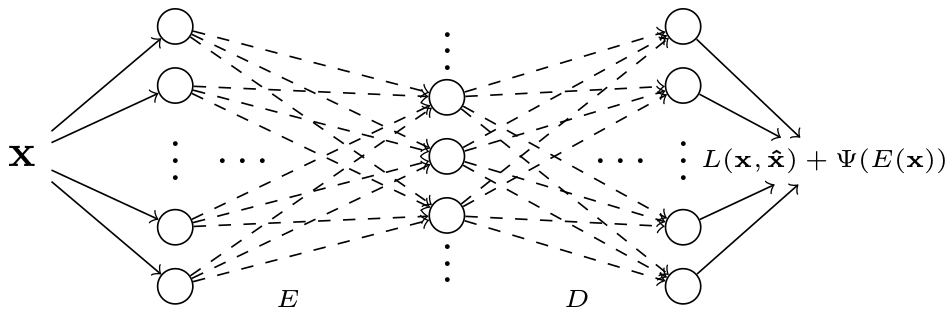

In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/ae4.png",width=600, height=600)

The minimization will be

<font size="3">
$$\min\limits_{\theta} L = \nabla_\theta L(\mathbf{x}, D(E(\mathbf{x}))) + \underbrace{\Psi(E(\mathbf{x}))}_{\text sparisty} =\nabla_\theta L(\mathbf{x}, \mathbf{\hat{x}}) $$
    </font>

This procedure can be interpreted as Bayesian inference with terms of posterior, likelihood and prior: $posterior \propto likelihood \times prior$. From this point maximizing the likelihood is equivalent to maximizing the posterior

<font size="3">
$$\max\limits_{\theta} p(\theta,\mathbf{x})=\max\limits_{\theta} p(\mathbf{x},\theta) \cdot p(\theta)$$
</font>

<font size="3">
$$=\max\limits_{\theta}\log p(\mathbf{x} | \theta) + \log p(\theta)$$ 
</font>

Now we can write our joint distribution in terms of prior of $\mathbf{h}$ and it's factor seeing $\mathbf{x}$ 

<font size="3">
$$p_{model}(\mathbf{x},\mathbf{h}) = p_{model}(\mathbf{x}|\mathbf{h}) \cdot p_{model}(\mathbf{h})$$
</font>

From this point, we can rewrite our likelihood and propose a prior distribution. 

<font size="3">
$$\log p_{model}(\mathbf{x},\mathbf{h}) = \log p_{model}(\mathbf{x}|\mathbf{h}) + \log p_{model}(\mathbf{h})$$
</font>

For simplicity, let us consider a zero-mean Laplacean prior

<font size="3">
$$ Lap(h_i|\mu=0,\lambda) = \frac{\lambda}{2}\exp(-\lambda|h_i - \mu|)$$

$$ = \frac{\lambda}{2}\exp(-\lambda|h_i |)$$
</font>

Then the posterior becomes

<font size="3">
$$\prod p_{model}(\mathbf{x}|h) \cdot \prod  p_{model}(h)$$
</font><br>

<font size="3">
$$= \sum \log p_{model}(\mathbf{x}|h) + \sum \log  p_{model}(h)$$
</font><br>

<font size="3">
$$ = \sum \log p_{model}(\mathbf{x}|h) - \lambda \sum |h|$$  
</font><br>

Other prior distributions like Student-t or Gaussian ($\text{L}_1$)  can make an impact for sparsity.

In [14]:
import torch.nn as nn
import torch
import torchvision
class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(
            in_features=kwargs["input_shape"], out_features=128
        )
        self.encoder_output_layer = nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_hidden_layer = nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_output_layer = nn.Linear(
            in_features=128, out_features=kwargs["input_shape"]
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.relu(activation)
        code = self.encoder_output_layer(activation)
        code = torch.relu(code)
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        return reconstructed

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AE(input_shape=784).to(device)
model = model.float()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

In [16]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(
    root="./data", train=True, transform=transform, download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="./data", train=False, transform=transform, download=True
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=32, shuffle=False, num_workers=4
)

In [17]:
epochs = 10
for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_loader:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        batch_features = batch_features.view(-1, 784).to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features.float())
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, reconstruction loss = {:.6f}".format(epoch + 1, epochs, loss))


epoch : 1/10, reconstruction loss = 0.033195
epoch : 2/10, reconstruction loss = 0.018802
epoch : 3/10, reconstruction loss = 0.016784
epoch : 4/10, reconstruction loss = 0.015779
epoch : 5/10, reconstruction loss = 0.015126
epoch : 6/10, reconstruction loss = 0.014653
epoch : 7/10, reconstruction loss = 0.014320
epoch : 8/10, reconstruction loss = 0.014067
epoch : 9/10, reconstruction loss = 0.013852
epoch : 10/10, reconstruction loss = 0.013702


## Variational Autoencoders